<a href="https://colab.research.google.com/github/govindvarma1/Machine-Learning-Lab/blob/main/Financial_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
bank_data = pd.read_csv('bank-additional-full.csv')

In [ ]:
bank_data.head()

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no


In [ ]:
bank_data['default'] = bank_data['default'].map({'no': 0, 'yes': 1, 'unknown': 0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [ ]:
X = bank_data.drop('y', axis=1)
Y = bank_data['y']

print(X)
print(Y)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0)

       age  default  cons.price.idx  cons.conf.idx
0       56        0          93.994          -36.4
1       57        0          93.994          -36.4
2       37        0          93.994          -36.4
3       40        0          93.994          -36.4
4       56        0          93.994          -36.4
...    ...      ...             ...            ...
41183   73        0          94.767          -50.8
41184   46        0          94.767          -50.8
41185   56        0          94.767          -50.8
41186   44        0          94.767          -50.8
41187   74        0          94.767          -50.8

[41188 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_Train, Y_Train)

RandomForestClassifier()

In [ ]:
Y_Train_Pred = rf.predict(X_Train)
Y_Test_Pred = rf.predict(X_Test)

print("Training Accuracy: {:.2f}%".format(accuracy_score(Y_Train, Y_Train_Pred)*100))
print("Testing Accuracy: {:.2f}%".format(accuracy_score(Y_Test, Y_Test_Pred)*100))

Training Accuracy: 90.66%
Testing Accuracy: 88.95%


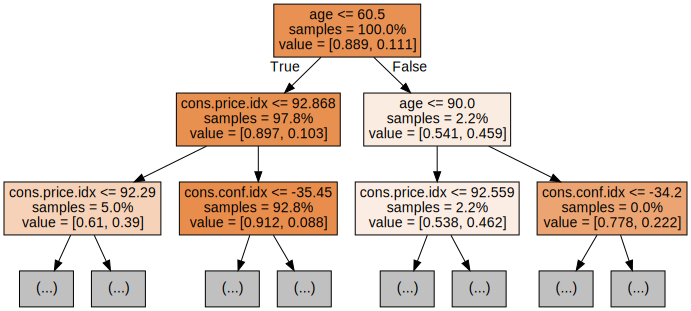

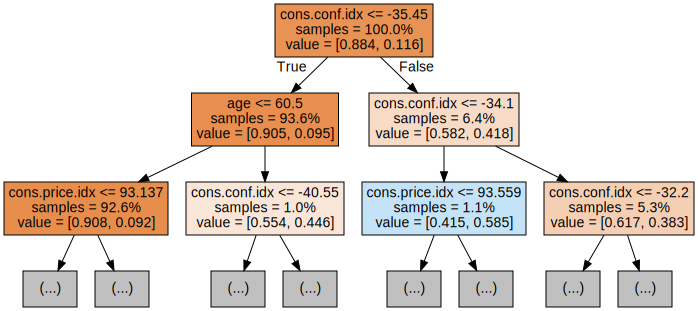

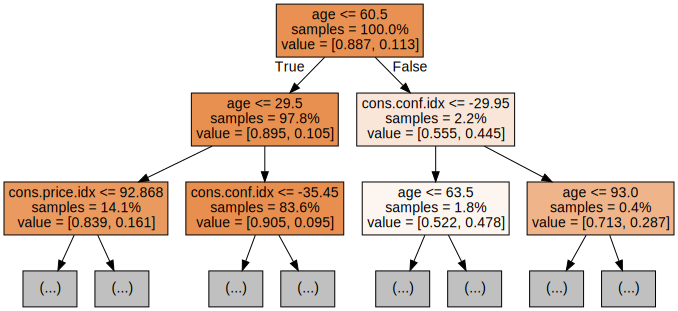

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_Train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')